# 1. Giới thiệu chung

Ở những bài trước chúng ta đã được tìm hiểu về model [GAN](https://phamdinhkhanh.github.io/2020/07/13/GAN.html) và huấn luyện model GAN theo phương pháp [Wasserstein](https://phamdinhkhanh.github.io/2020/07/25/GAN_Wasserstein.html). Những model này sẽ tìm ra mối liên hệ giữa không gian ẩn (_latent space_) với hình ảnh huấn luyện để biến đổi một véc tơ noise ngẫu nhiên trong không gian ẩn thành hình ảnh fake có chất lượng cao. Chúng ta cùng khái quát lại kiến trúc của model GAN qua hình minh họa và tóm lược bên dưới :

![](https://miro.medium.com/max/700/0*eHwnn-j4Wpkdh5F8.jpeg)

* Mô hình GAN sẽ huấn luyện đồng thời cả hai model là generator $G$ và discriminator $D$. Đây là một trò chơi zero-sum game trong lý thuyết trò chơi mà $G$ và $D$ được xem như là hai người chơi đối nghịch lợi ích.

* Mô hình generator sẽ tạo ra ảnh fake chất lượng tốt nhất để đánh lừa discriminator và discriminator sẽ tìm cách phân loại ảnh real và ảnh fake.

* Hàm loss function của GAN là kết hợp giữa loss function của generator và discriminator:

$$\min_{G} \max_{D} V(D, G) = \underbrace{\mathbb{E}_{x \sim p_{data}(x)} [\log D(x)]}_{\text{log-probability that D predict x is real}} + \underbrace{\mathbb{E}_{z \sim p_{z}(z)} [\log (1-D(G(z)))]}_{\text{log-probability D predicts G(z) is fake}} ~~~ (1)$$

* Trong đó mục tiêu huấn luyện của model G là nhằm tối thiểu hóa $\log(1-D(G(z))$ và mục tiêu huấn luyện của model D là tối đa hóa $\log D(x)$. 

* Qúa trình huấn luyện sẽ huấn luyện đồng thời G và D.








Mô hình GAN áp dụng các kiến trúc mạng tích chập học sâu còn được gọi là DCGAN (deep convolutional GAN). Do đó để thuận tiện, từ đây mình sẽ sử dụng tên gọi DCGAN thay cho GAN. Nhược điểm của mô hình DCGAN đó là chúng ta không thể kiểm soát được bức ảnh được sinh ra thuộc class nào. Định dạng ảnh hoàn toàn phụ thuộc vào mối quan hệ tiềm ẩn được định nghĩa trong phép ánh xạ từ véc tơ noise sang ảnh fake của generator. 

Trên thực tế  việc kiểm soát định dạng của ảnh fake là một nhu cầu cần thiết để tạo ra những bức ảnh theo ý muốn. Do đó mô hình CGAN (conditional GAN) đã đưa thêm tham số điều kiện nhãn để kiểm soát và định hướng định dạng ảnh fake. Có nghĩa là khi chúng ta sử dụng model generator để sinh ảnh fake thì chúng ta có thể biết được trước nhãn, kiểu và định dạng của ảnh fake dựa trên tham số nhãn được đưa thêm vào mô hình. Xin trích dẫn :

`Generative adversarial nets can be extended to a conditional model if both the generator and discriminator are conditioned on some extra information y. […] We can perform the conditioning by feeding y into the both the discriminator and generator as additional input layer.`

[Conditional Generative Adversarial Nets, 2014](https://arxiv.org/abs/1411.1784)

Cụ thể hơn về kiến trúc và phương pháp huấn luyện model CGAN chúng ta sẽ cùng tìm hiểu bên dưới.

# 2. CGAN


## 2.1. Kiến trúc model CGAN

Model DCGAN có đầu vào chỉ là véc tơ noise ngẫu nhiên $z$ được khởi tạo theo phân phối chuẩn hóa. Tuy nhiên ở model CGAN thì ở đầu vào sẽ có thêm nhãn $y$ như một tham số bổ sung cho mô hình `generator`. Chúng ta kỳ vọng rằng các bức ảnh fake được tạo ra sẽ nằm trong nhãn $y$. Đồng thời chúng ta cũng bổ sung nhãn $y$ vào `discriminator` để phân biệt tốt hơn ảnh real và ảnh fake. Cụ thể về kiến trúc model CGAN chúng ta có thể theo dõi qua hình bên dưới.

![](https://miro.medium.com/max/700/1*4MxI-OrQqVMCCLbZXBV3rg.jpeg)

**Hình 1:** Kiến trúc generator và discriminator của CGAN. Chúng ta thấy ở generator bên trái có đầu vào là véc tơ noise $z$ và nhãn $y$. Ảnh được sinh ra từ model generator là $G(z, y)$ sẽ giống với các ảnh thuộc class $y$ đầu vào. Đối với discriminator thì chúng ta cũng tiếp nhận đầu vào là ảnh $x$ và nhãn $y$. Ảnh $x$ có thể  là fake nếu được sinh ra từ mô hình generator hoặc là real nếu được lấy ra từ tập train. Discriminator sẽ nhằm mục tiêu dự đoán ảnh truyền vào là ảnh real hay ảnh fake. 

Sơ đồ quá trình kết hợp giữa `generator` và `discriminator` chúng ta có thể theo dõi qua hình bên dưới:

![](https://miro.medium.com/max/700/1*FpiLozEcc6-8RyiSTHjjIw.png)

**Hình 2:** Kết hợp giữa generator và discriminator trong model CGAN. Đầu vào của discriminator là kết hợp giữa ảnh $x$ và nhãn $y$. $x$ có thể được lấy từ real image hoặc khởi tạo từ generator thông qua véc tơ $z$ nằm trong không gian ẩn (_latent space_).



## 2.2. Vai trò của nhãn y

Lý do để chúng ta sử dụng nhãn $y$ trong mô hình CGAN đó là những thông tin đầu vào liên quan đến hình ảnh như nhãn là một trong những yếu tố giúp cải thiện chất lượng của model GAN. Sự cải thiện thể hiện ở mô hình ổn định hơn, quá trình huấn luyện nhanh hơn và chất lượng hình ảnh sinh ra tốt hơn. Nhãn đồng thời cũng là một trong những tham số giúp định hướng kết quả được sinh ra ở mô hình đầu ra theo ý muốn.

Trong trường hợp ảnh đưa vào mô hình là real như nhánh bên trái thì sẽ được gán nhãn 1 và nếu ảnh đưa vào mô hình là fake như nhánh bên phải thì sẽ được gán nhãn 0. Thông thường cũng giống như quá trình huấn luyện đối với model DCGAN thì tỷ lệ ảnh real/fake được truyền vào huấn luyện là 50:50. Chúng ta sẽ làm rõ hơn vấn đề phân chia tỷ lệ real/fake này ở phần thực hành.

## 2.3. One-hot embedding cho véc tơ nhãn y

Ngoài ra các bạn hẳn sẽ thắc mắc $y$ được concatenate với $x$ như thế nào để tạo thành đầu vào cho mô hình ?

Đầu tiên nhãn $y$ sẽ được chuyển thành một véc tơ one-hot có $n$ chiều trong đó $n$ là số lượng nhãn. Trong véc tơ one-hot chỉ có duy nhất một phần tử có giá trị bằng 1 tại vị trí tương ứng với nhãn $y$. Các vị trí còn lại bằng 0. VD: Nếu $y = 3$ thì sẽ được mã hóa thành véc tơ $(0, 0, 0, 1, 0, 0, 0, 0, 0, 0)$ mà ở đó vị trí thứ 4 có giá trị bằng 1. Lưu ý: 4 chính là vị trí của chữ số 3 trong các chữ số lần lượt từ $0-9$.

Sau khi đã mã hóa nhãn $y$ chúng ta sẽ concatenate với véc tơ $x$ đại diện cho bức ảnh có thể là real hoặc fake tùy ý. Véc tơ sau khi concatenate sẽ được sử dụng làm đầu vào cho discriminator.

## 2.4. Loss function

Model CGAN cũng có loss function tương tự như model GAN. Loss function là kết hợp giữa loss function của model discriminator với model generator.

$$\min_{G} \max_{D} V(D, G) = \underbrace{\mathbb{E}_{x \sim p_{data}(x)} [\log D(x)]}_{\text{log-probability that D predict x is real}} + \underbrace{\mathbb{E}_{z \sim p_{z}(z)} [\log (1-D(G(z)))]}_{\text{log-probability D predicts G(z) is fake}} ~~~ (1)$$

Để hiểu rõ hơn về các thành phần của loss function và tại sao loss function lại có tác dụng trong việc cải thiện đồng thời generator và discriminator, các bạn có thể xem lại [DCGAN loss function](https://phamdinhkhanh.github.io/2020/07/13/GAN.html#34-h%C3%A0m-loss-function).

Tiếp theo chúng ta sẽ cùng thực hành huấn luyện mô hình CGAN đối với các bức ảnh thời trang.

# 3. Thực hành

## 3.1. Dữ liệu

Dữ liệu mà chúng ta sẽ sử dụng để minh họa cho CGAN là bộ dữ liệu fashion-mnist, đây là bộ dữ liệu gồm 60000 bức ảnh trong đó tập train chiếm 50000 bức và tập test chiếm 10000 bức. Bộ dữ liệu được chia đều về 10 nhãn là các loại quần áo đặc trưng, kích thước của ảnh là `28 x 28` và ở định dạng ảnh một kênh màu. Bộ dữ liệu này được thay thế cho mnist để tăng thêm tính đa dạng và tránh sự lặp lại nhàm chán. Cả hai tập dữ liệu fashion-mnist và mnist là hai bộ dữ liệu thường được sử dụng để demo các thuật toán trong giảng dạy và học tập. Do đó chúng đã được tích hợp sẵn trong các framework phổ biến như tensorflow, pytorch.

Để load dữ liệu train, test của fashion-mnist trên keras, chúng ta sẽ thực hiện như bên dưới :

In [ ]:
from google.colab import drive
import os

drive.mount("/content/gdrive")
path = "gdrive/My Drive/Colab Notebooks/GAN"
os.chdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
# Shape model
print('Train shape: ', X_train.shape, y_train.shape)
print('Test shape : ', X_test.shape, y_test.shape)

Train shape:  (60000, 28, 28) (60000,)
Test shape :  (10000, 28, 28) (10000,)


Tiếp theo chúng ta sẽ khảo sát ngẫu nhiên 10 hình ảnh thuộc bộ dữ liệu này :

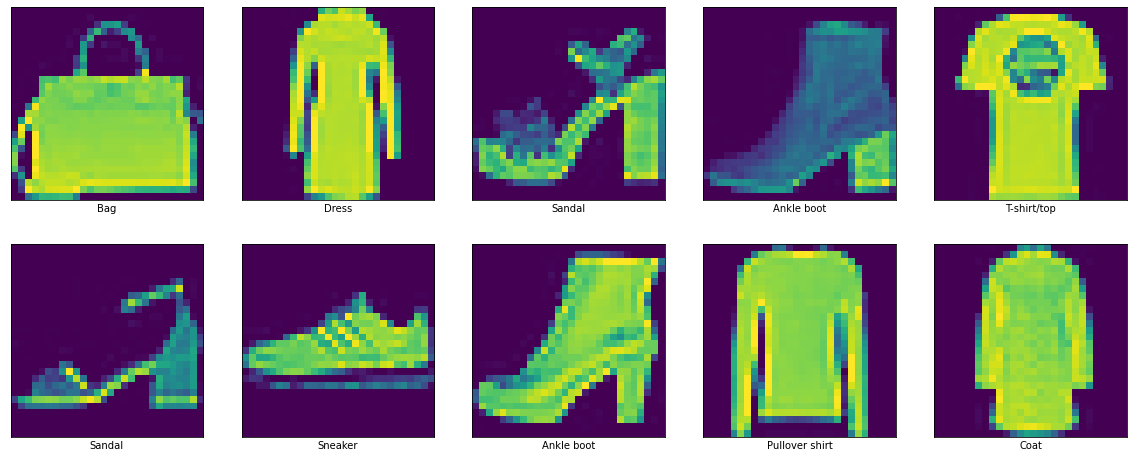

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


class_names = {
    0: "T-shirt/top",
  1: "Trouser/pants",
  2: "Pullover shirt",
  3: "Dress",
  4: "Coat",
  5: "Sandal",
  6: "Shirt",
  7: "Sneaker",
  8: "Bag",
  9: "Ankle boot"
}

idxs = np.arange(X_train.shape[0])
plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(idxs, 10)):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[idx])
    # Nếu muốn show ảnh gray thì thay lệnh plt.imshow() ở trên bằng lệnh bên dưới.
    # plt.imshow(X_train[idx], c_map='gray_r')
    plt.xlabel(class_names[y_train[idx]])
plt.show()

Ta nhận thấy các bức ảnh đều có độ phân giải thấp để giảm thiểu khối lượng tính toán cho demo. Phông nền của hình ảnh là màu đen tương ứng với các điểm ảnh có giá trị cường độ là 0. Phần trung tâm của bức ảnh là các bộ quần áo, giày có giá trị cường độ lớn hơn 0.





## 3.2. Kiến trúc mô hình

Tương tự như các thuật toán GAN khác, kiến trúc của CGAN cũng bao gồm 2 phases là generator và discriminator. Trong đó generator có tác dụng sinh ảnh và discriminator sẽ phân biệt giữa ảnh real và ảnh fake. Tuy nhiên trong model CGAN thì chúng ta sẽ có thêm _điều kiện_ của ảnh output bằng cách thêm véc tơ one-hot encoding của nhãn bức ảnh mà chúng ta muốn tạo cho cả generator và discriminator.



### 3.2.1 discriminator

Đầu vào của discriminator sẽ là một véc tơ concatenate giữa véc tơ biểu diễn ảnh với véc tơ one-hot của nhãn bức ảnh. Véc tơ one-hot của nhãn sau đó sẽ chiếu lên một không gian mới 50 chiều thông qua một phép chiếu linear-projection.

Backbone (tức là mạng CNN cơ sở) mà chúng ta sử dụng để huấn luyện model CGAN là một kiến trúc CNN thông thường làm nhiệm vụ trích suất các đặc trưng của ảnh. Bạn đọc có thể sử dụng thử bất kỳ một kiến trúc CNN model nào đã được trình bày tại [Bài 38 - Các kiến trúc CNN hiện đại](https://phamdinhkhanh.github.io/2020/05/31/CNNHistory.html). Hoặc có thể tự tạo cho mình một kiến trúc CNN tùy ý. Việc tạo kiến trúc CNN là không quá khó khăn, chúng ta có thể sử dụng các block CNN _[Conv + BatchNorm + Maxpooling]_ liên tiếp nhau để giảm chiều dữ liệu. Output của layer CNN cuối cùng sẽ được trải phẳng (flatten) thành một véc tơ và sử dụng các kết nối fully connected để thu được đầu ra với số lượng class mong muốn.

Bạn đọc sẽ hiểu rõ hơn qua phần thực hành bên dưới :

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dense, LeakyReLU, Embedding, Concatenate, Reshape, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def _discriminator(input_shape=(28, 28, 1), n_classes = 10):
  # 1. Khởi tạo nhánh input là y_label
  y_label = Input(shape=(1,))
  # Embedding y_label và chiếu lên không gian véc tơ 50 dimension.
  y_embedding = Embedding(n_classes, 50)(y_label)
  # Gia tăng kích thước y_embedding thông qua linear projection
  n_shape = input_shape[0] * input_shape[1]
  li = Dense(n_shape)(y_embedding)
  li = Reshape((input_shape[0], input_shape[1], 1))(li)
  
  # 2. Khởi tạo nhánh input là image
  inpt_image = Input(shape=(28, 28, 1))
  
  # 3. Concate y_label và image
  concat = Concatenate()([inpt_image, li])
  # 4. Feature extractor thông qua CNN blocks:
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(concat)
  fe = LeakyReLU(alpha=0.2)(fe)
  
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  
  # Flatten output
  fe = Flatten()(fe)
  fe = Dropout(0.4)(fe)
  out_layer = Dense(1, activation='sigmoid')(fe)

  # Khởi tạo model
  model = Model([inpt_image, y_label], out_layer)
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

Đồ thị của mô hình bên dưới cho chúng ta thấy rằng đầu vào của mô hình được concatenate từ hai nhánh. Một nhánh đọc dữ liệu từ các bức ảnh và một nhánh còn lại sẽ embedding nhãn thành một véc tơ 50 chiều. Sau khi concatenate dữ liệu thì chúng sẽ được truyền qua các CNN layer để trích lọc đặc trưng phục vụ cho mục đích phân loại ảnh real và fake. Đầu ra của mô hình discriminator chỉ bao gồm một unit dự báo xác suất thuộc về ảnh real hoặc fake.



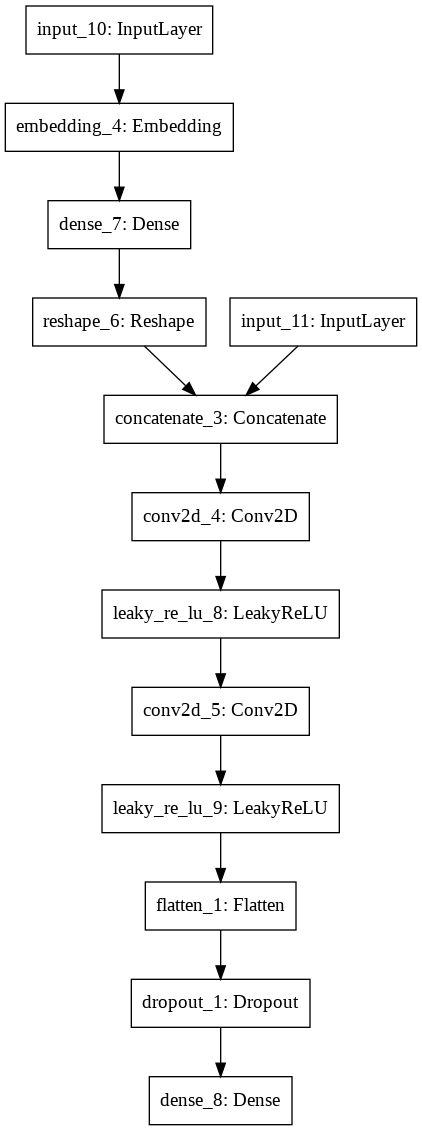

In [ ]:
from tensorflow.keras.utils import plot_model

discriminator = _discriminator(input_shape=(28, 28, 1), n_classes=10)
plot_model(discriminator)

Tiếp theo chúng ta sẽ cùng tim hiểu generator

### 3.2.2. Generator

Generator có tác dụng là sinh ra ảnh fake. Do đó đây là một mô hình image2image và chúng ta cần sử dụng [kiến trúc mạng giải chập](https://phamdinhkhanh.github.io/2020/06/10/ImageSegmention.html#5-m%E1%BA%A1ng-gi%E1%BA%A3i-ch%E1%BA%ADp-deconvolutional-neural-network) để biến đổi các features ngược trở lại ảnh gốc.

Đầu vào của generator cũng bao gồm 2 nhánh, một nhánh là véc tơ noise gồm 100 chiều tương tự như trong model DCGAN. Nhánh còn lại ghi nhận thông tin về nhãn của ảnh mà chúng ta muốn mô hình biến đổi. Nhãn sẽ được one-hot encoding để tạo thành những thông tin mới được xem như là điều kiện để model geneartor tạo ra ảnh.

Hai nhánh sau đó được concatenate với nhau tạo ra một input vừa chứa đầu vào là véc tơ ngẫu nhiên $x$ và vừa chứa điều kiện về nhãn $y$. Do đó chúng ta có thể kiểm soát được bức ảnh sinh ra thông qua việc điều chỉnh điều kiện $y$.

Một mạng giải chập được sử dụng để tăng dần kích thước các layers về bằng với bức ảnh gốc.

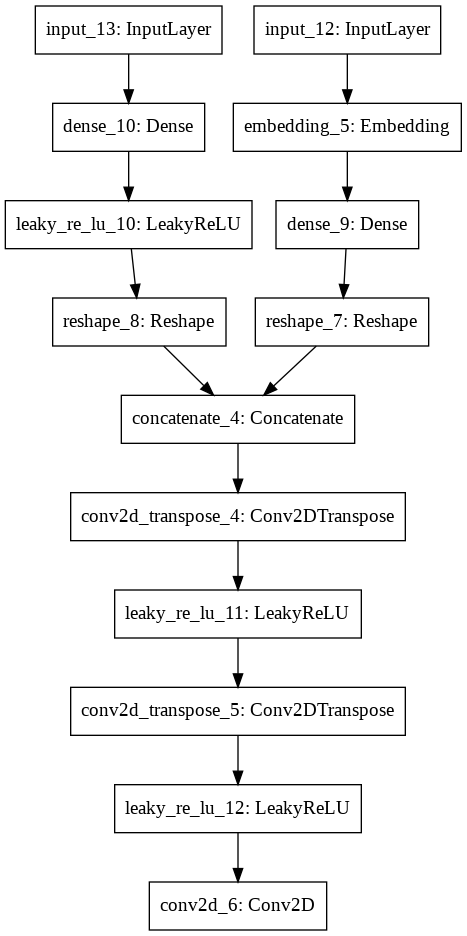

In [ ]:
def _generator(latent_dim=100, n_classes=10):
  # 1. Khởi tạo nhánh đầu vào là y_label
  y_label = Input(shape=(1,))
  # embedding véc tơ categorical đầu vào
  li = Embedding(n_classes, 50)(y_label)
  n_shape = 7 * 7
  li = Dense(n_shape)(li)
  # reshape lại đầu vào về kích thước 7x7x1 như một channel bổ sung.
  li = Reshape((7, 7, 1))(li)

  # 2. Khởi tạo nhánh đầu vào là véc tơ noise x
  in_lat = Input(shape=(latent_dim,))
  n_shape = 128 * 7 * 7
  gen = Dense(n_shape)(in_lat)
  gen = LeakyReLU(alpha=0.2)(gen)
  # Biến đổi về kích thước 7x7x128
  gen = Reshape((7, 7, 128))(gen)

  # 3. Merge nhánh 1 và nhánh 2
  merge = Concatenate()([gen, li])

  # 4. Sử dụng Conv2DTranspose để giải chập về kích thước ban đầu.
  gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
  gen = LeakyReLU(alpha=0.2)(gen)

  gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
  gen = LeakyReLU(alpha=0.2)(gen)
  # output
  out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
  # model
  model = Model([in_lat, y_label], out_layer)
  return model

generator = _generator(latent_dim=100, n_classes=10)
plot_model(generator)

### 3.2.3. CGAN model

Tiếp theo chúng ta sẽ cùng khởi tạo model CGAN từ hai model generator và discriminator. 

* Đầu tiên dữ liệu sẽ được truyền qua generator model để thu được đầu ra là một bức ảnh. Lưu ý input của generator trong CGAN ngoài véc tơ noise sẽ có thêm label so với model GAN.

* Tiếp theo output của generator sẽ được truyền vào model discriminator để phân biệt ảnh real và ảnh fake. Input của discriminator cũng bao gồm ảnh được sinh ra từ generator và label.

* CGAN model sẽ là một pipeline end2end kết hợp generator và discriminator. Chúng ta sẽ thông qua CGAN để huấn luyện generator. Do đó discriminator sẽ được đóng băng.

Hàm loss function của CGAN sẽ giống như DCGAN và là một hàm dạng `binary_crossentropy`.

In [ ]:
def _cgan(g_model, d_model):
	# Do cgan được sử dụng để huấn luyện generator nên discriminator sẽ được đóng băng
	d_model.trainable = False
	# Lấy đầu vào của generator model bao gồm véc tơ noise và nhãn
	gen_noise, gen_label = g_model.input
	# Lấy ảnh sinh ra từ generator model
	gen_output = g_model.output
	# Truyền output và nhãn của mô hình generator vào mô hình discriminator
	gan_output = d_model([gen_output, gen_label])
	# Khởi tạo mô hình CGAN
	model = Model([gen_noise, gen_label], gan_output)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

cgan_model = _cgan(generator, discriminator)
plot_models(cgan_model)

### 3.2.4. Huấn luyện model

Để quá trình huấn luyện ổn định hơn chúng ta sẽ chuẩn hóa các giá trị cường độ pixel ảnh về khoảng $[-1, 1]$ thông qua công thức.

$$x_{std} = \frac{x-127.5}{127.5}$$

In [ ]:
# Hàm chuẩn hóa dữ liệu huấn luyện
def _standardize_data(X_train, y_train):
	X = np.expand_dims(X_train, axis=-1)
	X = X.astype('float32')
  # chuẩn hóa dữ liệu về khoảng [-1, 1]
	X = (X - 127.5) / 127.5
	return [X, y_train]

Tiếp theo chúng ta sẽ lựa chọn ra ngẫu nhiên `n_samples` từ dữ liệu thật làm ảnh real để huấn luyện mô hình

In [ ]:
# Lựa chọn ngẫu nhiên các dữ liệu huấn luyện
def _generate_real_samples(dataset, n_samples):
	images, labels = dataset
	# Lựa chọn n_samples index ảnh
	ix = np.random.randint(0, images.shape[0], n_samples)
	# Lựa chọn ngẫu nhiên n_sample từ index.
	X, labels = images[ix], labels[ix]
  # Khởi tạo nhãn 1 cho ảnh real
	y = np.ones((n_samples, 1))
	return [X, labels], y

Tương tự chúng ta cũng tạo ra một batch gồm `n_samples` từ dữ liệu fake được sinh ra từ generator model.

In [ ]:
# Sinh ra các véc tơ noise trong không gian latent space làm đầu vào cho generator
def _generate_latent_points(latent_dim, n_samples, n_classes=10):
	# Khởi tạo các points trong latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape thành batch để feed vào generator.
	z_input = x_input.reshape(n_samples, latent_dim)
	# khởi tạo labels một cách ngẫu nhiên.
	labels = np.random.randint(0, n_classes, n_samples)
	return [z_input, labels]
 
# Sử dụng generator để sinh ra n_samples ảnh fake.
def _generate_fake_samples(generator, latent_dim, n_samples):
	# Khởi tạo các điểm ngẫu nhiên trong latent space.
	z_input, labels_input = _generate_latent_points(latent_dim, n_samples)
	# Dự đoán outputs từ generator
	images = generator.predict([z_input, labels_input])
	# Khởi tạo nhãn 0 cho ảnh fake
	y = np.zeros((n_samples, 1))
	return [images, labels_input], y

Tiếp theo chúng ta sẽ huấn luyện mô hình một cách xen kẽ giữa generator và discriminator. Quá trình huấn luyện trên mỗi batch như sau:

* Huấn luyện mô hình trên discriminator trước. Trong đó 1/2 batch là ảnh real và 1/2 batch còn lại là ảnh fake.
* Huấn luyện mô hình trên generator thông qua huấn luyện model CGAN trên 1 batch.

Sau mỗi mặc định 10 epochs thì model CGAN sẽ được lưu lại.


In [ ]:
def _train(g_model, d_model, cgan_model, dataset, latent_dim, n_epochs=100, n_batch=128, save_every_epochs=10):
	'''
	g_model: generator model
	d_model: discriminator model
	cgan_model: gan_model
	dataset: dữ liệu huấn luyện, bao gồm: (X_train, y_train)
	latent_dim: Số chiều của latent space
	n_epochs: Số lượng epochs
	n_batch: Kích thước batch_size
	save_every_epochs: Số lượng epochs mà chúng ta sẽ save model.
	'''
	# Tính số lượng batch trên một epochs
	batch_per_epoch = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# Huấn luyện mô hình qua từng epochs
	for i in range(n_epochs):
		# Khởi tạo batch trên tập train
		for j in range(batch_per_epoch):
			# 1. Huấn luyện model discrinator
			# Khởi tạo batch cho ảnh real ngẫu nhiên
			[X_real, labels_real], y_real = _generate_real_samples(dataset, half_batch)
			# Cập nhật discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# Khởi tạo batch cho ảnh fake ngẫu nhiên
			[X_fake, labels], y_fake = _generate_fake_samples(g_model, latent_dim, half_batch)
			# Cập nhật weights cho discriminator model
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
	 		# 2. Huấn luyện model generator
			# Khởi tạo các điểm ngẫu nhiên trong latent space như là đầu vào cho generator
			[z_input, labels_input] = _generate_latent_points(latent_dim, n_batch)
			# Khởi tạo nhãn discriminator cho các dữ liệu fake. Do chúng ta giả định là generator đánh lừa được discriminator nên nhãn của ảnh là 1.
			y_gan = np.ones((n_batch, 1))
			# Huấn luyện generator thông qua model CGAN
			g_loss = cgan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, batch_per_epoch, d_loss1, d_loss2, g_loss))
	if (i % save_every_epochs) & (i > 0):
		g_model.save('cgan_generator_epoch{}.h5'.format(i))
	# save the generator model
	g_model.save('cgan_generator.h5')

Huấn luyện model.

In [ ]:
# Kích thước latent space
latent_dim = 100
# Khởi tạo discriminator
d_model = _discriminator()
# Khởi tạo generator
g_model = _generator(latent_dim)
# Khởi tạo cgan
cgan_model = _cgan(g_model, d_model)
# load image data
dataset = _standardize_data(X_train, y_train)
# train model
_train(g_model, d_model, cgan_model, dataset, latent_dim)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
>1, 428/468, d1=0.689, d2=0.687 g=0.715
>1, 429/468, d1=0.670, d2=0.687 g=0.740
>1, 430/468, d1=0.657, d2=0.680 g=0.750
>1, 431/468, d1=0.681, d2=0.660 g=0.791
>1, 432/468, d1=0.658, d2=0.654 g=0.771
>1, 433/468, d1=0.703, d2=0.669 g=0.763
>1, 434/468, d1=0.710, d2=0.689 g=0.773
>1, 435/468, d1=0.684, d2=0.687 g=0.734
>1, 436/468, d1=0.673, d2=0.697 g=0.750
>1, 437/468, d1=0.655, d2=0.703 g=0.726
>1, 438/468, d1=0.664, d2=0.711 g=0.713
>1, 439/468, d1=0.692, d2=0.725 g=0.720
>1, 440/468, d1=0.692, d2=0.728 g=0.717
>1, 441/468, d1=0.668, d2=0.747 g=0.700
>1, 442/468, d1=0.717, d2=0.695 g=0.710
>1, 443/468, d1=0.667, d2=0.729 g=0.703
>1, 444/468, d1=0.680, d2=0.718 g=0.706
>1, 445/468, d1=0.654, d2=0.709 g=0.711
>1, 446/468, d1=0.670, d2=0.710 g=0.716
>1, 447/468, d1=0.674, d2=0.716 g=0.716
>1, 448/468, d1=0.670, d2=0.690 g=0.726
>1, 449/468, d1=0.656, d2=0.698 g=0.727
>1, 450/468, d1=0.668, d2=0.686 g=0.746
>1, 451/468, d1=0.678, 

# 4. Kết luận

Như vậy với model CGAN, chúng ta đã kiểm soát được những bức ảnh được tạo ra theo ý muốn. Đây có thể được xem như một bước đột phát của GAN vì trên thực tế có rất nhiều những bức ảnh mà ta sẽ phải định hướng kết quả về hình dạng, format. CGAN cũng tạo ra những đột phá mới về chất lượng hình ảnh và sự ổn định trong quá trình huấn luyện. Qua bài viết này các bạn đã nắm được kiến trúc của một model CGAN và quá trình để huấn luyện một model CGAN điển hình trên bộ dữ liệu fashion-mnist. Đây sẽ là tiền đề để chúng ta vận dụng model CGAN trên những bộ dữ liệu khác.

Code mẫu của mô hình được cung cấp tại [CGAN model](https://github.com/phamdinhkhanh/CGAN).


# 5. Tham khảo

1. [GAN](https://phamdinhkhanh.github.io/2020/07/13/GAN.html)

2. [Wasserstein GAN](https://phamdinhkhanh.github.io/2020/07/25/GAN_Wasserstein.html)

3. [GAN — CGAN & InfoGAN (using labels to improve GAN) - Jonathan Hui](https://medium.com/@jonathan_hui/gan-cgan-infogan-using-labels-to-improve-gan-8ba4de5f9c3d)

4. [Conditional Generative Adversarial Nets - origin paper - Mehdi Mirza, Simon Osindero](https://arxiv.org/abs/1411.1784)

5. [Conditional GAN network - machinelearning mastery](https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/)

6. [Conditional GAN - cs231 standford](http://cs231n.stanford.edu/reports/2015/pdfs/jgauthie_final_report.pdf)

7. [Generative Adversarial Network (GAN) with Extra Conditional Inputs - Sik-Ho Tsang](https://medium.com/ai-in-plain-english/review-cgan-conditional-gan-gan-78dd42eee41)

8. [InfoMax-GAN: Improved Adversarial Image Generation via Information Maximization and Contrastive Learning - Kwot Sin Lee, Ngoc-Trung Tran, Ngai-Man Cheung](https://arxiv.org/abs/2007.04589)


